<a href="https://colab.research.google.com/github/aer3090/GA-Final-Project_Squirrel_Census/blob/main/GA_Final_Project_Squirrel_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Source: 2018 Central Park Squirrel Census**

The Squirrel Census (https://www.thesquirrelcensus.com/) is a multimedia science, design, and storytelling project focusing on the Eastern gray (Sciurus carolinensis). They count squirrels and present their findings to the public. This table contains squirrel data for each of the 3,023 sightings, including location coordinates, age, primary and secondary fur color, elevation, activities, communications, and interactions between squirrels and with humans.

# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Install Geopandas and Descartes
!pip install geopandas
!pip install descartes
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.7MB/s 
     |████████████████████████████████| 14.8MB 314kB/s 


In [2]:
# Import CSV from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/My Drive/data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv"
df = pd.read_csv(path)

In [4]:
df.head(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,Gray+Cinnamon,NaN,Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,Cinnamon+,NaN,Above Ground,4,NaN,False,False,True,False,False,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581)
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,Gray+,NaN,Above Ground,3,NaN,False,False,True,False,False,NaN,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755)
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,+,NaN,Above Ground,NaN,NaN,False,False,False,False,False,unknown,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163)


In [5]:
df.tail(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,Gray+,NaN,Ground Plane,FALSE,NaN,False,False,False,True,True,NaN,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,Gray+White,NaN,Ground Plane,FALSE,NaN,False,False,False,False,True,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White","Gray+Black, Cinnamon, White",NaN,Ground Plane,FALSE,NaN,False,False,False,True,True,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White","Gray+Cinnamon, White",NaN,Ground Plane,FALSE,NaN,False,False,False,True,False,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)
3022,-73.975479,40.769640,5E-PM-1012-01,05E,PM,10122018,1,Adult,Cinnamon,"Gray, White","Cinnamon+Gray, White",NaN,Ground Plane,FALSE,NaN,False,False,False,True,True,NaN,False,False,False,False,False,True,False,False,NaN,POINT (-73.9754794191553 40.7696404489025)


From this we can see that our dataframe imported correctly and we have 3023  differrent squirrel entries.




# Problem Statement

What I would like to find out based on this data:

1. What is the most common Fur color?
2. How many Adult vs Juvenile squirrels where there?
3. Squirrels found above ground vs on the ground
4. Most exhibited trait based on time shift and age.
5. What patterns can I find based on Latitude and Longtitude plot points?


# Data Cleaning

Let's remove some columns we won't use and rename some columns

In [6]:
squirrel = df.drop(columns = ['Unique Squirrel ID', 'Hectare', 'Hectare Squirrel Number', 'Highlight Fur Color', 'Combination of Primary and Highlight Color', 'Color notes', 'Above Ground Sighter Measurement', 'Specific Location', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Other Interactions', 'Lat/Long', 'Date'])

In [7]:
squirrel.rename(columns={'Primary Fur Color': 'Color','X': 'Latitude', 'Y':'Longtitude'}, inplace = True)

In [8]:
squirrel.head(5)

,Latitude,Longtitude,Shift,Age,Color,Location,Running,Chasing,Climbing,Eating,Foraging
0,-73.956134,40.794082,PM,NaN,NaN,NaN,False,False,False,False,False
1,-73.957044,40.794851,PM,Adult,Gray,Ground Plane,True,False,False,False,False
2,-73.976831,40.766718,AM,Adult,Cinnamon,Above Ground,False,False,True,False,False
3,-73.975725,40.769703,PM,Juvenile,Gray,Above Ground,False,False,True,False,False
4,-73.959313,40.797533,AM,NaN,NaN,Above Ground,False,False,False,False,False


In [9]:
squirrel.tail(5)

,Latitude,Longtitude,Shift,Age,Color,Location,Running,Chasing,Climbing,Eating,Foraging
3018,-73.963943,40.790868,AM,Adult,Gray,Ground Plane,False,False,False,True,True
3019,-73.970402,40.782560,PM,Adult,Gray,Ground Plane,False,False,False,False,True
3020,-73.966587,40.783678,PM,Adult,Gray,Ground Plane,False,False,False,True,True
3021,-73.963994,40.789915,PM,NaN,Gray,Ground Plane,False,False,False,True,False
3022,-73.975479,40.769640,PM,Adult,Cinnamon,Ground Plane,False,False,False,True,True


# Let's Analyse and Visualize some data 

Let's find out how many different colors of squirrels were found.

In [10]:
squirrel['Color'].value_counts()

Gray        2473
Cinnamon     392
Black        103
Name: Color, dtype: int64

Let's fill in the null values so that we can plot all the squirrels by replacing them with a string.

In [11]:
squirrel.Color.fillna('Color Not Identified', inplace=True)
squirrel['Color'].value_counts()

Gray                    2473
Cinnamon                 392
Black                    103
Color Not Identified      55
Name: Color, dtype: int64

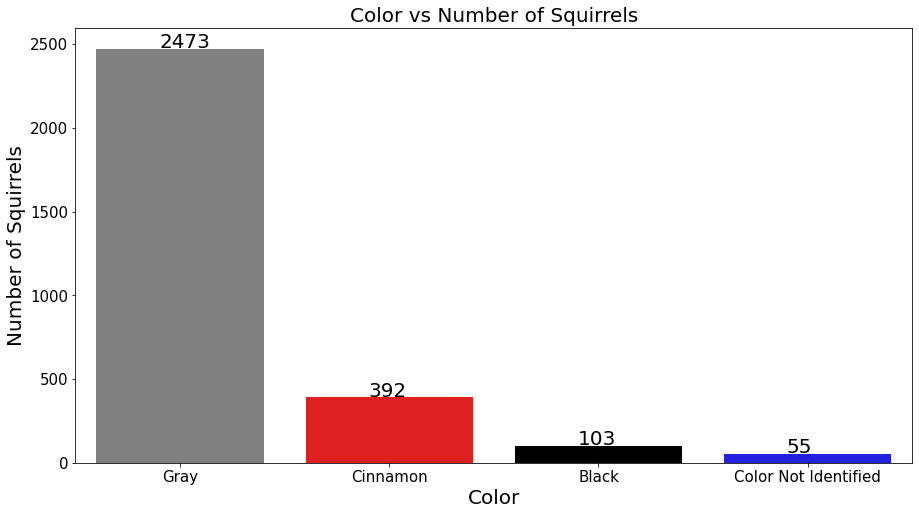

In [12]:
# Ploting the data using a seaborn count plot
colors = ['gray', 'red', 'black', 'blue']
plt.figure(figsize=(15,8))
squirrel_bar = sns.countplot(x="Color", data=squirrel, palette = colors, order=["Gray", "Cinnamon", 'Black', "Color Not Identified"]);
plt.xlabel("Color", fontsize=20)
plt.ylabel("Number of Squirrels", fontsize=20)       
plt.title("Color vs Number of Squirrels", fontsize=20)
plt.tick_params(labelsize=15)
for s in squirrel_bar.patches:
    squirrel_bar.annotate(s.get_height(), (s.get_x()+0.30, s.get_height()+5), fontsize=20)
plt.show();

In [13]:
# Let's turn these results into percentages
squirrel['Color'].value_counts(normalize=True) * 100

Gray                    81.806153
Cinnamon                12.967251
Black                    3.407211
Color Not Identified     1.819385
Name: Color, dtype: float64

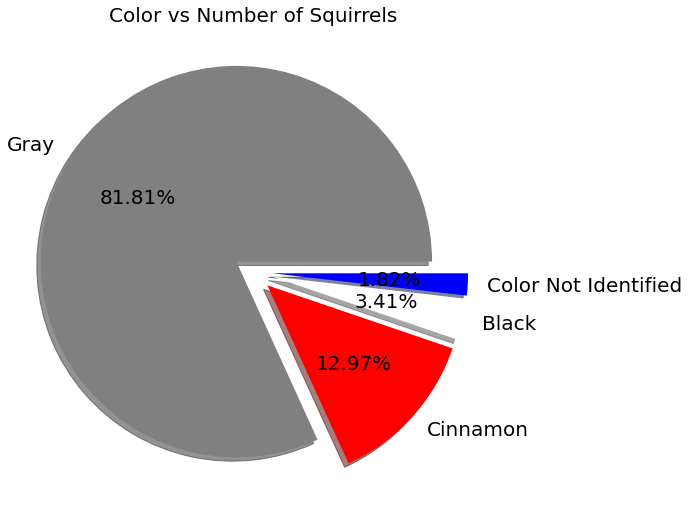

In [14]:
# Now let's make a piechart to visually show these percentages
values = ['Gray', 'Cinnamon', 'Black', 'Color Not Identified']
v_counts = squirrel['Color'].value_counts(normalize=True) * 100
total = len(values)
fig = plt.figure()
explode = (.1,.1,.1,.1)
plt.pie(v_counts, explode= explode, labels=v_counts.index, textprops={'fontsize': 20}, autopct='%1.2f%%', shadow=True, colors=['gray', 'red', 'white', 'blue'])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Color vs Number of Squirrels", fontsize=20)
plt.show;

Let's compare how many adult squirrels vs juvenile and lets fill in those null values so we can get an accurate count

In [15]:
squirrel.Age.fillna('?', inplace=True)
squirrel['Age'].value_counts()

Adult       2568
Juvenile     330
?            125
Name: Age, dtype: int64

In [16]:
# Squirrel age as a percentage
squirrel['Age'].value_counts(normalize=True) * 100

Adult       84.948726
Juvenile    10.916308
?            4.134965
Name: Age, dtype: float64

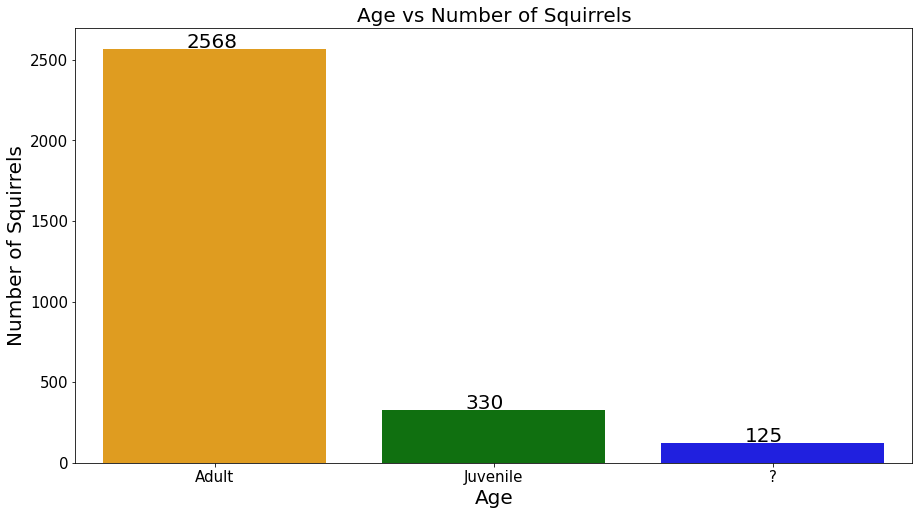

In [17]:
colors_2 = ['orange', 'green', 'blue']
plt.figure(figsize=(15,8))
squirrel_bar_2 = sns.countplot(x="Age", data=squirrel, palette = colors_2, order=["Adult", "Juvenile", '?']);
plt.xlabel("Age", fontsize=20)
plt.ylabel("Number of Squirrels", fontsize=20)       
plt.title("Age vs Number of Squirrels", fontsize=20)
plt.tick_params(labelsize=15)
for s in squirrel_bar_2.patches:
    squirrel_bar_2.annotate(s.get_height(), (s.get_x()+0.30, s.get_height()+5), fontsize=20)
plt.show();

Let's compare how many squirrels were found above ground vs on the ground and let's fill in those null values.

In [18]:
squirrel.Location.fillna('N/A', inplace=True)
squirrel['Location'].value_counts()

Ground Plane    2116
Above Ground     843
N/A               64
Name: Location, dtype: int64

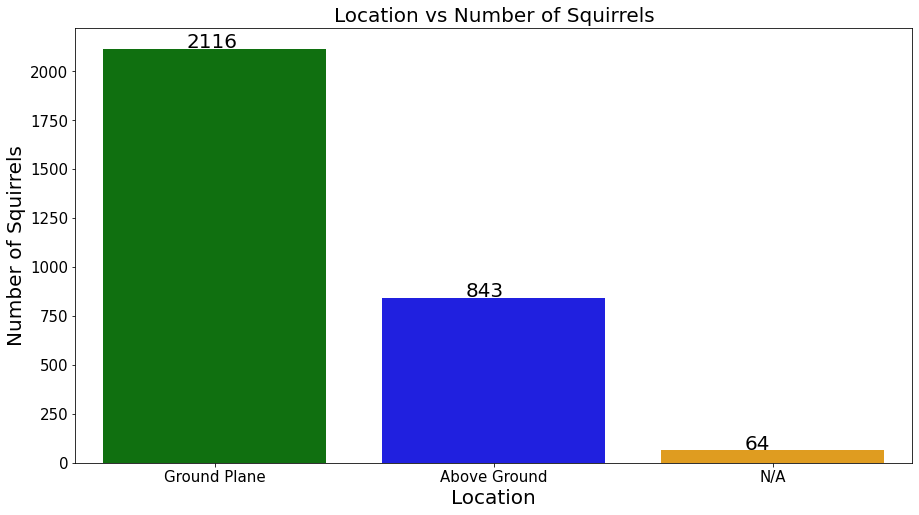

In [19]:
colors_3 = ['green', 'blue', 'orange']
plt.figure(figsize=(15,8))
squirrel_bar_3 = sns.countplot(x="Location", data=squirrel, palette = colors_3, order=["Ground Plane", "Above Ground", 'N/A']);
plt.xlabel("Location", fontsize=20)
plt.ylabel("Number of Squirrels", fontsize=20)       
plt.title("Location vs Number of Squirrels", fontsize=20)
plt.tick_params(labelsize=15)
for s in squirrel_bar_3.patches:
    squirrel_bar_3.annotate(s.get_height(), (s.get_x()+0.30, s.get_height()+5), fontsize=20)
plt.show();

Now let's put all of these graphs together and see what is the primary color and location of each age group.

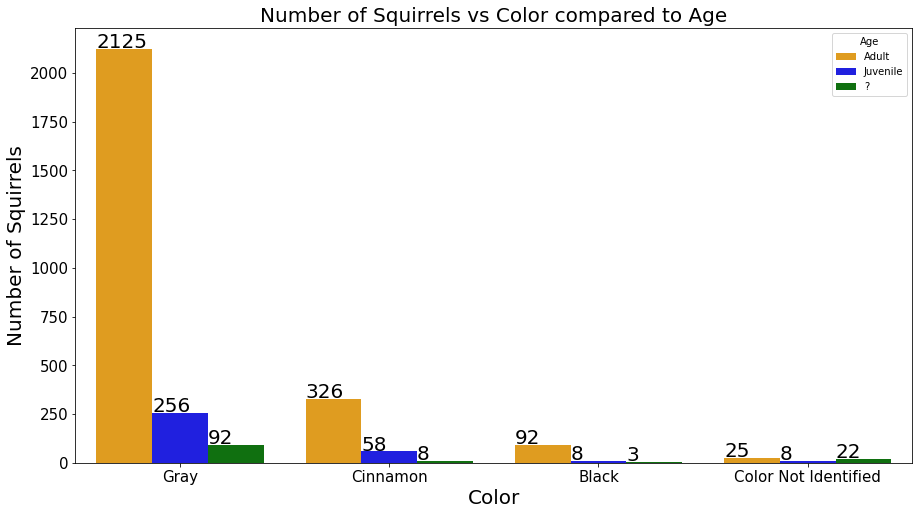

In [20]:
plt.figure(figsize=(15,8))
squirrel_bar = sns.countplot(x="Color", hue="Age", hue_order=['Adult', 'Juvenile', '?'], data=squirrel, order=["Gray", "Cinnamon", 'Black', "Color Not Identified"], palette=['orange','blue','green']);
plt.xlabel("Color", fontsize=20)
plt.ylabel("Number of Squirrels", fontsize=20)       
plt.title("Number of Squirrels vs Color compared to Age", fontsize=20)
plt.tick_params(labelsize=15)
for s in squirrel_bar.patches:
    squirrel_bar.annotate(s.get_height(), (s.get_x(), s.get_height()+6), fontsize=20)
plt.show();

Let's do the same comparison as above but with location instead of color.

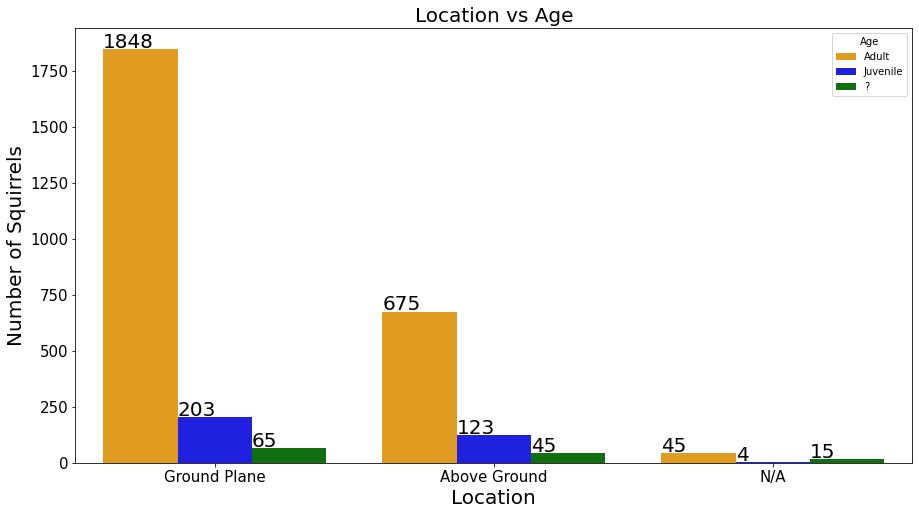

In [21]:
plt.figure(figsize=(15,8))
squirrel_bar = sns.countplot(x="Location", hue="Age", hue_order=['Adult', 'Juvenile', '?'], data=squirrel, order=["Ground Plane", "Above Ground", 'N/A'], palette=['orange','blue','green']);
plt.xlabel("Location", fontsize=20)
plt.ylabel("Number of Squirrels", fontsize=20)       
plt.title("Location vs Age", fontsize=20)
plt.tick_params(labelsize=15)
for s in squirrel_bar.patches:
    squirrel_bar.annotate(s.get_height(), (s.get_x(), s.get_height()+6), fontsize=20)
plt.show();

Let's compare what traits the squirrels were exhibiting during the time of recording.

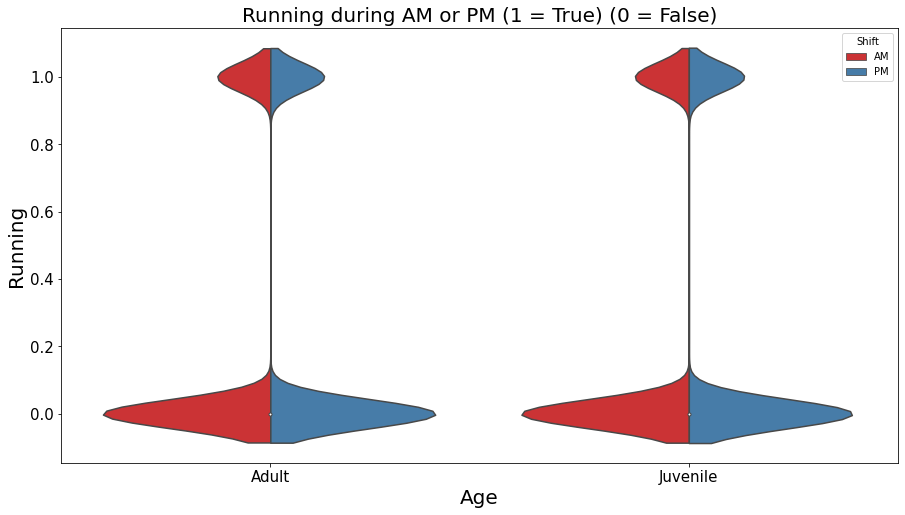

In [22]:
plt.figure(figsize=(15,8))
plt.xlabel("Running", fontsize=20)
plt.ylabel("Age", fontsize=20)       
plt.title("Running during AM or PM (1 = True) (0 = False)", fontsize=20)
plt.tick_params(labelsize=15)
sns.violinplot(x='Age', y='Running', data=squirrel, hue='Shift', split=True, hue_order=['AM','PM'], order=['Adult','Juvenile'], bw=.1, palette="Set1");

In [23]:
squirrel['Running'].value_counts()

False    2293
True      730
Name: Running, dtype: int64

We can see that both Adult and Juvenile squirreles run just as much in the morning as they do in the evening and that both ages run equally as much.

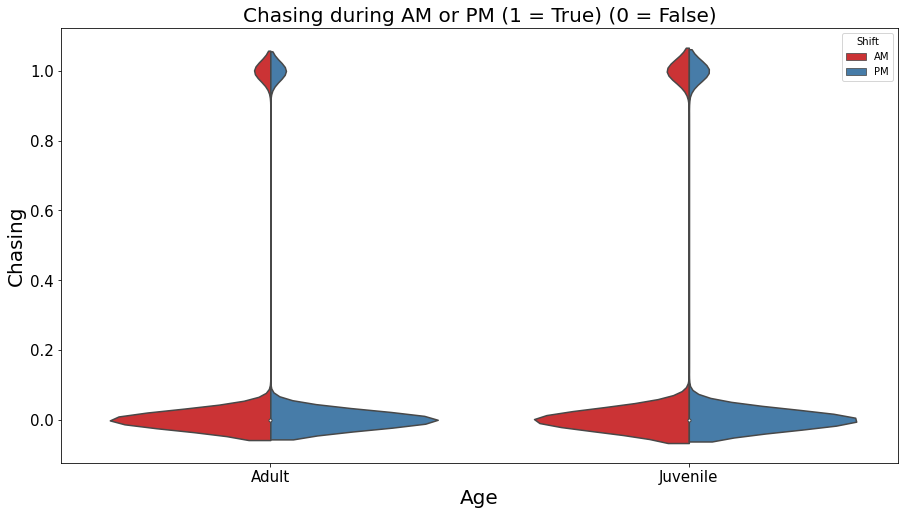

In [24]:
plt.figure(figsize=(15,8))
plt.xlabel("Chasing", fontsize=20)
plt.ylabel("Age", fontsize=20)       
plt.title("Chasing during AM or PM (1 = True) (0 = False)", fontsize=20)
plt.tick_params(labelsize=15)
sns.violinplot(x='Age', y='Chasing', data=squirrel, hue='Shift', split=True, hue_order=['AM','PM'], order=['Adult','Juvenile'], bw=.1, palette="Set1");

In [25]:
squirrel['Chasing'].value_counts()

False    2744
True      279
Name: Chasing, dtype: int64

From this graph we can see that juvenile squirrels enjoy chasing each other more than adult squirrels.

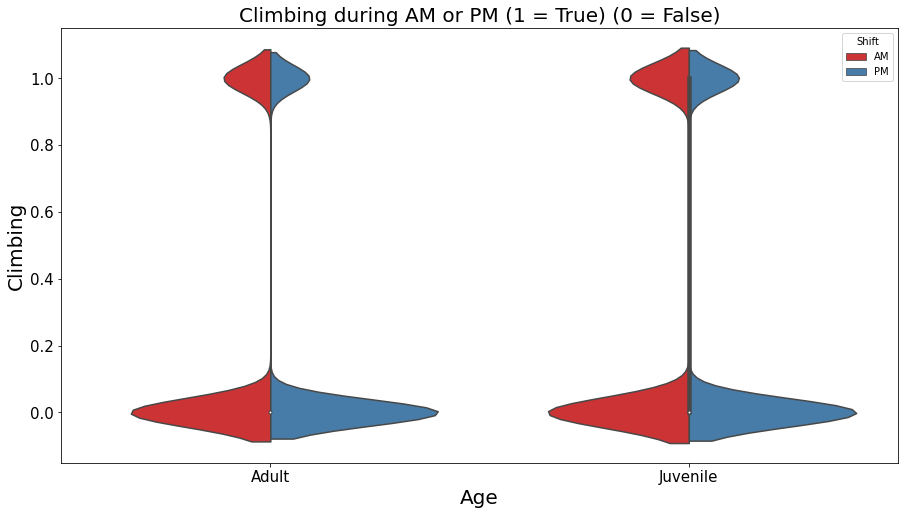

In [26]:
plt.figure(figsize=(15,8))
plt.xlabel("Climbing", fontsize=20)
plt.ylabel("Age", fontsize=20)       
plt.title("Climbing during AM or PM (1 = True) (0 = False)", fontsize=20)
plt.tick_params(labelsize=15)
sns.violinplot(x='Age', y='Climbing', data=squirrel, hue='Shift', split=True, hue_order=['AM','PM'], order=['Adult','Juvenile'], bw=.1, palette="Set1");

In [27]:
squirrel['Climbing'].value_counts()

False    2365
True      658
Name: Climbing, dtype: int64

From this graph we can see that juvenile squirrels tend to climn more in the morning compared to adult squirrels.

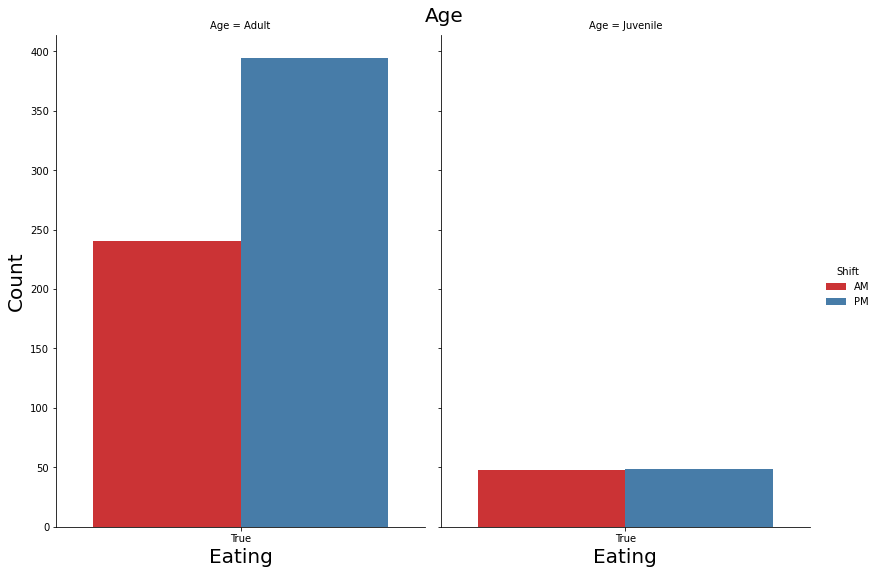

In [28]:
e = sns.catplot(x="Eating", hue="Shift", col="Age", data=squirrel[squirrel['Eating']], kind='count', hue_order=['AM','PM'], col_order=['Adult','Juvenile'], palette="Set1");
e.fig.set_size_inches(12,8)
e.set_xlabels('Eating', fontsize=20)
e.set_ylabels('Count', fontsize=20);
e.fig.suptitle('Age', fontsize=20);

In [29]:
squirrel['Eating'].value_counts()

False    2263
True      760
Name: Eating, dtype: int64

Shifted to a different type of graph that better displays differences, here we can see an accurate count of squirrels and what shift they were seen eating. From this we can gather that Adult squirrels prefer eating in the evening and that juvenile squirrels eat about the same regardless of the time of day.

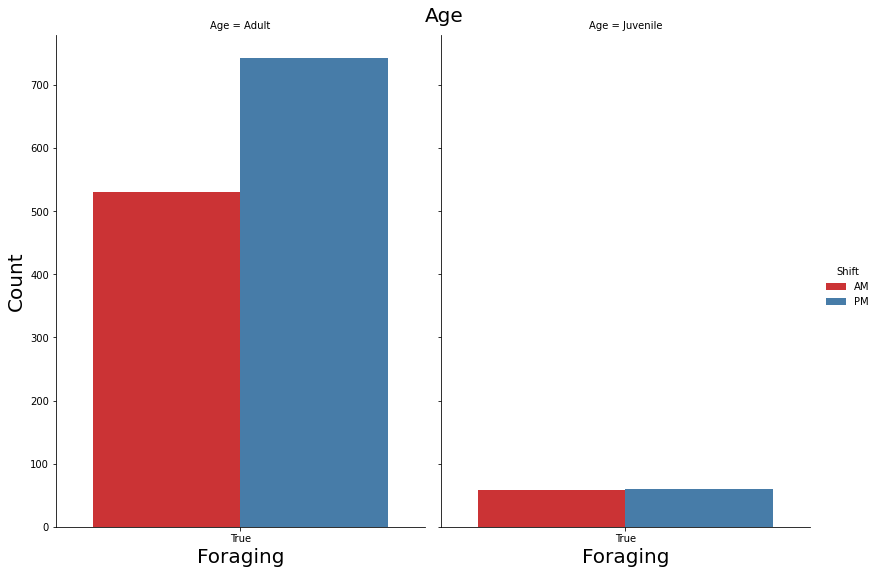

In [30]:
f = sns.catplot(x="Foraging", hue="Shift", col="Age", data=squirrel[squirrel['Foraging']], kind='count', hue_order=['AM','PM'], col_order=['Adult','Juvenile'], palette="Set1");
f.fig.set_size_inches(12,8)
f.set_xlabels('Foraging', fontsize=20)
f.set_ylabels('Count', fontsize=20);
f.fig.suptitle('Age', fontsize=20);

In [31]:
squirrel['Foraging'].value_counts()

False    1588
True     1435
Name: Foraging, dtype: int64

From this graph we can see that Adult squirrels like to forage in the evening and that juvenile squirrels forage about the same regardless of time of day.

# Let's plot the squirrels on map using GeoPanda

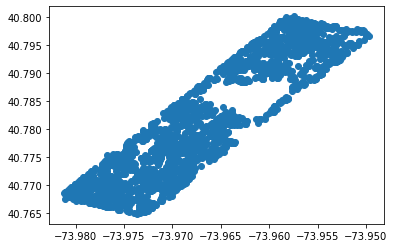

In [32]:
# This is what we get if we just plot the Latitude and Longtitude, surprisingly you get an accurate representation of the geographical area of Central Park.
plt.scatter(x=squirrel['Latitude'], y=squirrel['Longtitude'])
plt.show()

GeoPanda requires that the data is inputed as a Point so we have to zip up our Latitude and Longtitude and provide a column with this data for the plot points.

In [34]:
point = [Point(xy) for xy in zip(squirrel['Latitude'], squirrel['Longtitude'])]
gdf = GeoDataFrame(squirrel, geometry=point)
# We need either a SHP or SHX map file for GeoPandas to accurate display a map 
centralpark = gpd.read_file('/content/drive/My Drive/data/centralpark.shp')
#Confirming the new geometry column with points
gdf.head(5)

,Latitude,Longtitude,Shift,Age,Color,Location,Running,Chasing,Climbing,Eating,Foraging,geometry
0,-73.956134,40.794082,PM,?,Color Not Identified,N/A,False,False,False,False,False,POINT (-73.95613 40.79408)
1,-73.957044,40.794851,PM,Adult,Gray,Ground Plane,True,False,False,False,False,POINT (-73.95704 40.79485)
2,-73.976831,40.766718,AM,Adult,Cinnamon,Above Ground,False,False,True,False,False,POINT (-73.97683 40.76672)
3,-73.975725,40.769703,PM,Juvenile,Gray,Above Ground,False,False,True,False,False,POINT (-73.97572 40.76970)
4,-73.959313,40.797533,AM,?,Color Not Identified,Above Ground,False,False,False,False,False,POINT (-73.95931 40.79753)


Let's plot the data points and see how it looks on the map.

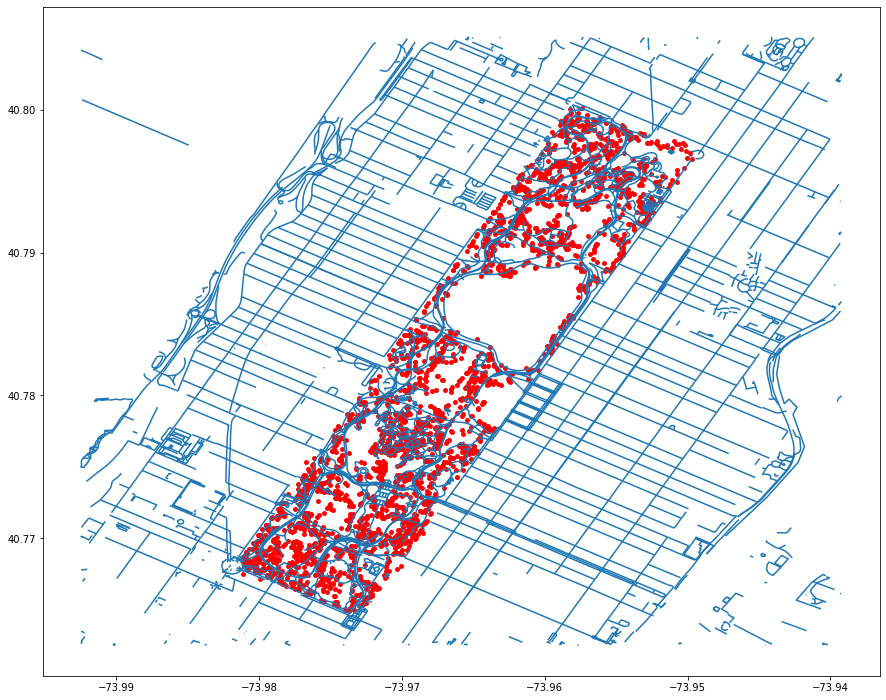

In [35]:
gdf.plot(ax=centralpark.plot(figsize=(15, 15)), color='red', markersize=15);

Let's color cordinate our points by squirrel color!

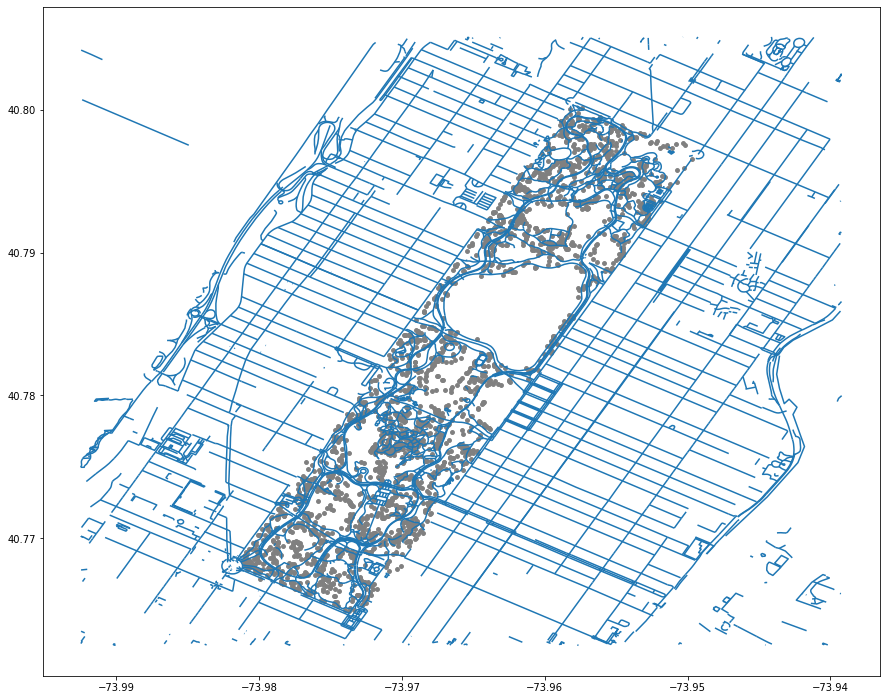

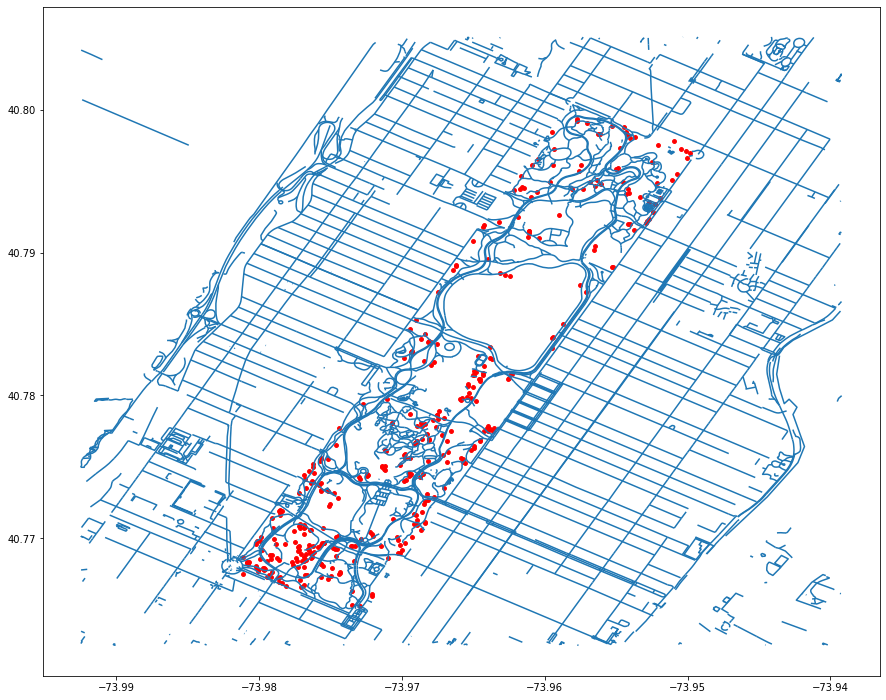

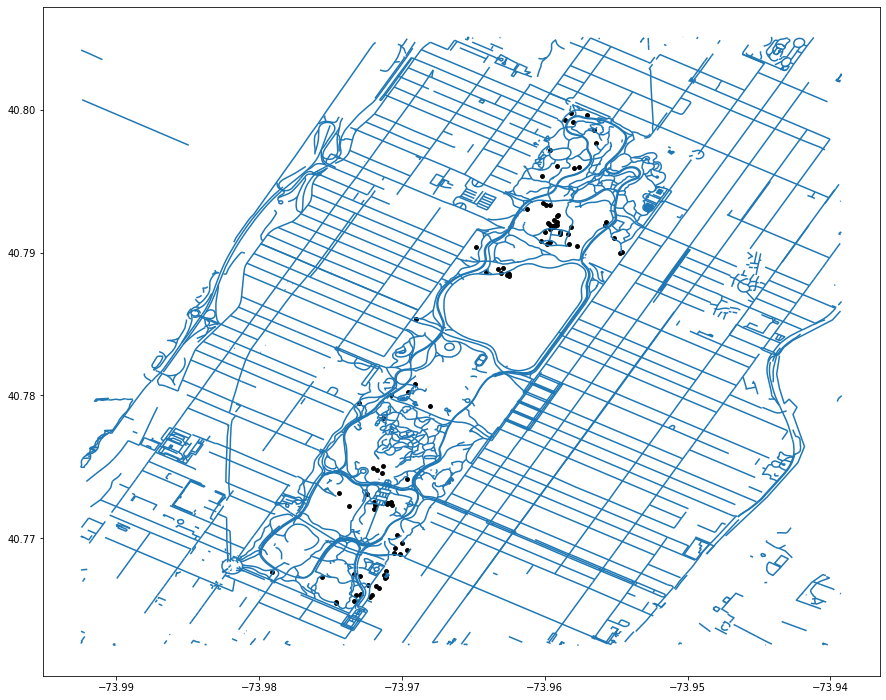

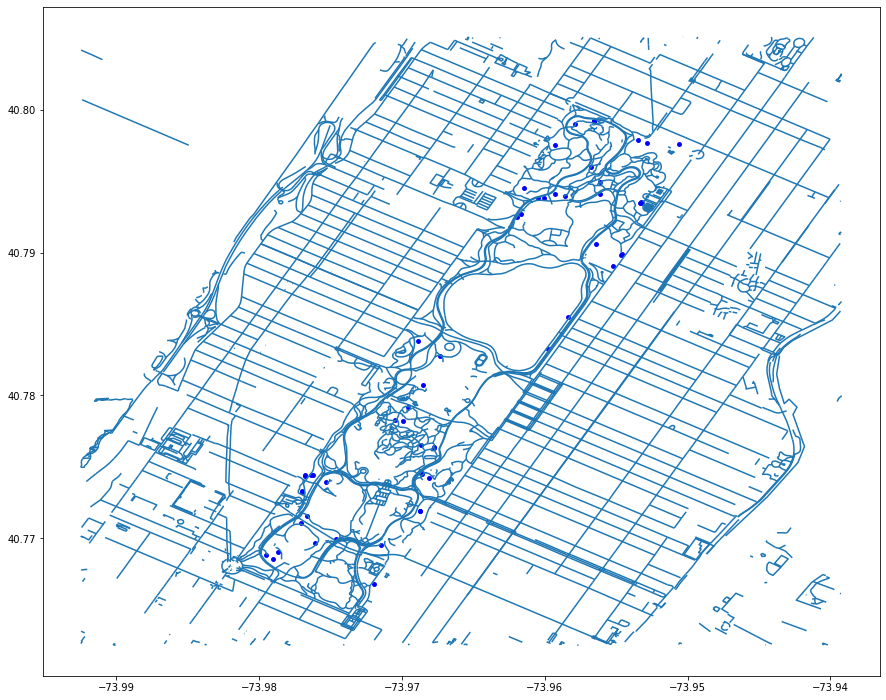

In [36]:
gdf[gdf['Color'] == 'Gray'].plot(ax=centralpark.plot(figsize=(15, 15)), color='gray', markersize=15);
gdf[gdf['Color'] == 'Cinnamon'].plot(ax=centralpark.plot(figsize=(15, 15)), color='red', markersize=15);
gdf[gdf['Color'] == 'Black'].plot(ax=centralpark.plot(figsize=(15, 15)), color='black', markersize=15);
gdf[gdf['Color'] == 'Color Not Identified'].plot(ax=centralpark.plot(figsize=(15, 15)), color='blue', markersize=15);

The map plot above gave us 3 individual maps let's put all the different color plot points on the same map.

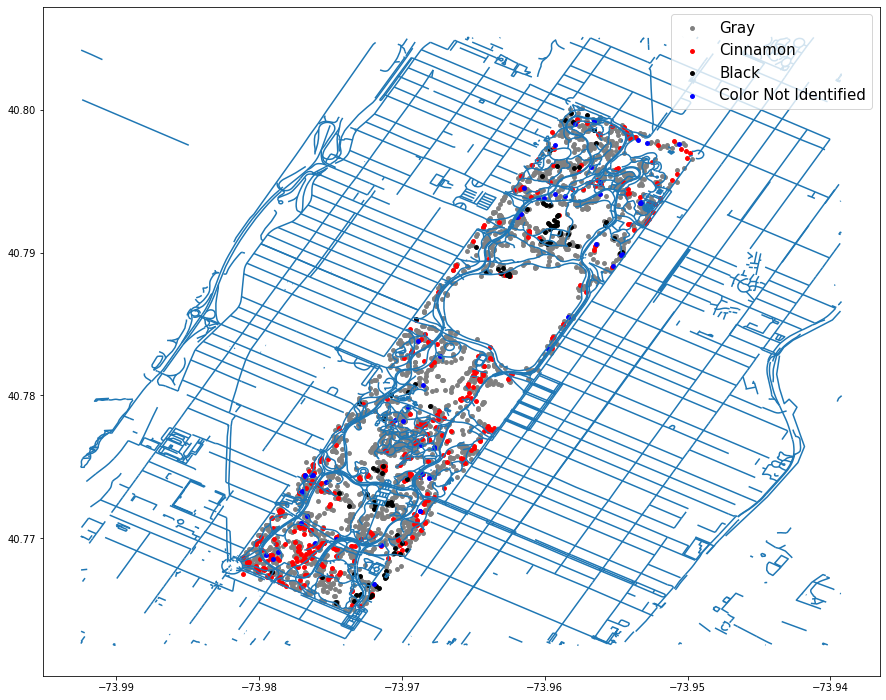

In [37]:
ax = centralpark.plot(figsize=(15, 15))
gdf[gdf['Color'] == 'Gray'].plot(ax=ax, color='gray', markersize=15, label = 'Gray')
gdf[gdf['Color'] == 'Cinnamon'].plot(ax=ax, color='red', markersize=15, label = 'Cinnamon')
gdf[gdf['Color'] == 'Black'].plot(ax=ax, color='black', markersize=15, label = 'Black')
gdf[gdf['Color'] == 'Color Not Identified'].plot(ax=ax, color='blue', markersize=15, label = 'Color Not Identified')
plt.legend(prop={'size': 15});

# Conclusion

1. From this data we can gather that the largest percentage of squirrels in Central Park are Grey squirrels making up 81.81% of the population, while Black squirrels make up the least at 3.41%. This data makes sense sense Black squirrels are a mutation.

2. I was able to determine that the majority of squirrels are adult as they made up about 85% of the population.

3. According to this data squirrels spend more time on the ground than on trees or above ground as the majority were spotted on the ground.

4. Based on the data I was able to gather that both adult and juvenile squirrels like running about the same during both morning and afternoon hours
Juvenile squirrels chased each other more than adult squirrels, but preferred climbing more in the morning hours.
More adult squirrels were found eating and foraging during the PM hours compared to juveniles.

5. I found it interesting that I was able to see the shape of Central Park based on the lat and long points provided in the dataframe. Grey and cinnamon squirrels are all over the park but black squirrels seem to be a bit more concentrated. 
